## Basic DNN model to for testing #no prepocessing done except normalisation

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from datetime import datetime, date
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from datetime import datetime, date

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/data.csv")
df

,your_type_of_document,your_nationality,your_gender,your_birthdate,your_foreigner,period,your_consecutive,your_marital_status,your_student,your_country_resides,your_have_ethnicity,your_dept_resides,your_dept_code_resides,your_municipality_resides,your_municipality_code_resides,your_high_school_degree,your_tuition_cost_university,your_tuition_pymt_scholarship,your_tuition_pymt_credit,your_tuition_pymt_parents,your_tuition_pymt_yourself,fami_current_household_type,fami_is_the_head_family,fami_econ_dependents,fami_father_education,fami_mother_education,fami_father_occupation,fami_mother_occupation,fami_housing_stratum,fami_internet,fami_computer,fami_automobile,fami_num_books,inst_institution_code,inst_institution_name,your_prgm_academic,group_reference,your_prgm_municipality_code,your_prgm_municipality,your_prgm_department,...,fami_social_stratum_sisben,fami_house_members,fami_house_rooms,fami_house_floor,fami_washer,fami_microwave,fami_oven,fami_dvd,fami_monthly_family_income,your_currently_working,your_background,cole_saber_11_icfes_code,cole_saber_11_icfes_dane,cole_saber_11_icfes_name,cole_type,cole_nature,cole_calendar,cole_bilingual,cole_character,cole_dane_code_campus,cole_name_campus,cole_main_campus,cole_area_location,cole_journey,cole_municipality_code_location,cole_municipality_location,cole_dept_code_location,cole_dept_location,score_language_saber_11,score_mathematics_saber_11,score_biology_saber_11,score_chemistry_saber_11,score_physics_saber_11,score_social_science_saber_11,score_philosophy_saber_11,score_english_saber_11,score_english_saber_11_category,optative_field_saber_11,score_optative_saber_11,optative_category_saber_11
0,TI,COLOMBIA,M,30/07/1996,NO,20134,EK201340233804,Single,STUDENT,COLOMBIA,No,BOYACA,15.0,GUATEQUE,15322.0,Technical Bachelor,Did not pay tuition,No,No,Si,No,It is habitual or permanent,No,None,Undergraduate Degree complete,Middle School complete,Profesional independiente,Profesional independiente,Stratum 3,Si,No,No,Unknown,9110,SERVICIO NACIONAL DE APRENDIZAJE-SENA,TECNOLOGÍA EN CONTABILIDAD Y FINANZAS,TECNOLOGICO EN ADMINISTRACIÓN Y TURISMO,11001,BOGOTÁ D.C.,BOGOTA,...,Not classified by SISBEN,Four,Four,"Polished wood, tile, tablet, marble, carpet",Si,Si,Si,Si,Unknown,No,No,5207.0,1.153220e+11,I.E. VALLE DE TENZA,MIXED,OFFICIAL,A,N,TECHNICAL/ACADEMIC,1.153220e+11,I.E. VALLE DE TENZA - SEDE PRINCIPAL,YES,URBAN,MORNING,15322.0,GUATEQUE,15.0,BOYACA,32.0,43.0,39.0,42.0,33.0,33.0,29.0,38.0,A-,SCORE_INTERDISC_ENVIRONMENT,49.0,UNK
1,CC,COLOMBIA,M,13/04/1994,NO,20133,EK201330220754,Single,STUDENT,COLOMBIA,No,AMAZONAS,91.0,LETICIA,91001.0,Academic Bachelor,Did not pay tuition,No,No,Si,No,It is habitual or permanent,No,None,Middle School complete,Technical School complete,Empleado de nivel auxiliar o administrativo,Self-employed,Stratum 2,No,Si,Si,Unknown,2106,DIRECCION NACIONAL DE ESCUELAS-BOGOTÁ D.C.,TECNICO PROFESIONAL EN SERVICIO DE POLICIA,TECNOLOGICO EN MILITAR Y POLICIAL,11001,BOGOTÁ D.C.,BOGOTA,...,Not classified by SISBEN,Five,Three,"Cement, gravel, brick",Si,No,No,Si,Between 2 and less than 3 SMLV,"Yes, 20 hours or more per week",No,38919.0,1.910010e+11,I.E. INEM JOSE EUSTASIO RIVERA,MIXED,OFFICIAL,A,N,TECHNICAL/ACADEMIC,1.910010e+11,I.E. INEM JOSE EUSTASIO RIVERA - SEDE PRINCIPAL,YES,URBAN,MORNING,91001.0,LETICIA,91.0,AMAZONAS,48.0,64.0,52.0,52.0,54.0,44.0,47.0,51.0,A1,SCORE_DEEPEN_LANGUAGE,6.0,II
2,CC,COLOMBIA,F,08/12/1991,NO,20134,EK201340246502,Single,STUDENT,COLOMBIA,No,RISARALDA,66.0,DOSQUEBRADAS,66170.0,Technical Bachelor,Did not pay tuition,No,No,Si,No,It is habitual or permanent,No,None,Elementary school incomplete,Elementary school incomplete,Other activity or occupation,Home,Stratum 2,No,No,No,Unknown,9110,SERVICIO NACIONAL DE APRENDIZAJE-SENA,TECNOLOGÍA EN CONTABILIDAD Y FINANZAS,TECNOLOGICO EN ADMINISTRACIÓN Y TURISMO,66001,PEREIRA,RISARALDA,...,Level 2,Five,Three,"Cement, gravel, brick",Si,Si,Si,Si,Less than 1 SMLV,No,Si,61424.0,1.660010e+11,IE AQUILINO BEDOYA,MIXED,OFFICIAL,

In [4]:
df['your_undergraduate_core'].value_counts()

ADMINISTRATION                                      35790
LAW                                                 15263
PUBLIC ACCOUNTING                                   14334
EDUCATION                                           14219
INDUSTRIAL ENGINEERING                              10660
                                                    ...  
NUTRITION AND DIET                                    264
AGRICULTURAL, FOREST ENGINEERING                      244
PHISICS                                               191
TRAINING RELATED TO THE MILITARY OR POLICE FIELD      168
REPRESENTATIVE ARTS                                   164
Name: your_undergraduate_core, Length: 64, dtype: int64

In [3]:
Y_encode, Y_name = pd.factorize(df['your_undergraduate_core'])

In [5]:
Y_encode

array([ 0,  1,  0, ...,  3,  4, 22])

In [6]:
X = df.drop(['your_student', 'your_undergraduate_core'], axis=1)
#your_student has only single categorical value

In [7]:
def age(born):
  born = datetime.strptime(born, "%d/%m/%Y").date()
  today = date.today()
  return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))

In [8]:
X['your_birthdate'] = X['your_birthdate'].apply(age)
X

,your_type_of_document,your_nationality,your_gender,your_birthdate,your_foreigner,period,your_consecutive,your_marital_status,your_country_resides,your_have_ethnicity,your_dept_resides,your_dept_code_resides,your_municipality_resides,your_municipality_code_resides,your_high_school_degree,your_tuition_cost_university,your_tuition_pymt_scholarship,your_tuition_pymt_credit,your_tuition_pymt_parents,your_tuition_pymt_yourself,fami_current_household_type,fami_is_the_head_family,fami_econ_dependents,fami_father_education,fami_mother_education,fami_father_occupation,fami_mother_occupation,fami_housing_stratum,fami_internet,fami_computer,fami_automobile,fami_num_books,inst_institution_code,inst_institution_name,your_prgm_academic,group_reference,your_prgm_municipality_code,your_prgm_municipality,your_prgm_department,your_prgm_academic_level,...,fami_social_stratum_sisben,fami_house_members,fami_house_rooms,fami_house_floor,fami_washer,fami_microwave,fami_oven,fami_dvd,fami_monthly_family_income,your_currently_working,your_background,cole_saber_11_icfes_code,cole_saber_11_icfes_dane,cole_saber_11_icfes_name,cole_type,cole_nature,cole_calendar,cole_bilingual,cole_character,cole_dane_code_campus,cole_name_campus,cole_main_campus,cole_area_location,cole_journey,cole_municipality_code_location,cole_municipality_location,cole_dept_code_location,cole_dept_location,score_language_saber_11,score_mathematics_saber_11,score_biology_saber_11,score_chemistry_saber_11,score_physics_saber_11,score_social_science_saber_11,score_philosophy_saber_11,score_english_saber_11,score_english_saber_11_category,optative_field_saber_11,score_optative_saber_11,optative_category_saber_11
0,TI,COLOMBIA,M,25,NO,20134,EK201340233804,Single,COLOMBIA,No,BOYACA,15.0,GUATEQUE,15322.0,Technical Bachelor,Did not pay tuition,No,No,Si,No,It is habitual or permanent,No,None,Undergraduate Degree complete,Middle School complete,Profesional independiente,Profesional independiente,Stratum 3,Si,No,No,Unknown,9110,SERVICIO NACIONAL DE APRENDIZAJE-SENA,TECNOLOGÍA EN CONTABILIDAD Y FINANZAS,TECNOLOGICO EN ADMINISTRACIÓN Y TURISMO,11001,BOGOTÁ D.C.,BOGOTA,TECHNOLOGY,...,Not classified by SISBEN,Four,Four,"Polished wood, tile, tablet, marble, carpet",Si,Si,Si,Si,Unknown,No,No,5207.0,1.153220e+11,I.E. VALLE DE TENZA,MIXED,OFFICIAL,A,N,TECHNICAL/ACADEMIC,1.153220e+11,I.E. VALLE DE TENZA - SEDE PRINCIPAL,YES,URBAN,MORNING,15322.0,GUATEQUE,15.0,BOYACA,32.0,43.0,39.0,42.0,33.0,33.0,29.0,38.0,A-,SCORE_INTERDISC_ENVIRONMENT,49.0,UNK
1,CC,COLOMBIA,M,27,NO,20133,EK201330220754,Single,COLOMBIA,No,AMAZONAS,91.0,LETICIA,91001.0,Academic Bachelor,Did not pay tuition,No,No,Si,No,It is habitual or permanent,No,None,Middle School complete,Technical School complete,Empleado de nivel auxiliar o administrativo,Self-employed,Stratum 2,No,Si,Si,Unknown,2106,DIRECCION NACIONAL DE ESCUELAS-BOGOTÁ D.C.,TECNICO PROFESIONAL EN SERVICIO DE POLICIA,TECNOLOGICO EN MILITAR Y POLICIAL,11001,BOGOTÁ D.C.,BOGOTA,PROFESSIONAL TECHNICIAN,...,Not classified by SISBEN,Five,Three,"Cement, gravel, brick",Si,No,No,Si,Between 2 and less than 3 SMLV,"Yes, 20 hours or more per week",No,38919.0,1.910010e+11,I.E. INEM JOSE EUSTASIO RIVERA,MIXED,OFFICIAL,A,N,TECHNICAL/ACADEMIC,1.910010e+11,I.E. INEM JOSE EUSTASIO RIVERA - SEDE PRINCIPAL,YES,URBAN,MORNING,91001.0,LETICIA,91.0,AMAZONAS,48.0,64.0,52.0,52.0,54.0,44.0,47.0,51.0,A1,SCORE_DEEPEN_LANGUAGE,6.0,II
2,CC,COLOMBIA,F,29,NO,20134,EK201340246502,Single,COLOMBIA,No,RISARALDA,66.0,DOSQUEBRADAS,66170.0,Technical Bachelor,Did not pay tuition,No,No,Si,No,It is habitual or permanent,No,None,Elementary school incomplete,Elementary school incomplete,Other activity or occupation,Home,Stratum 2,No,No,No,Unknown,9110,SERVICIO NACIONAL DE APRENDIZAJE-SENA,TECNOLOGÍA EN CONTABILIDAD Y FINANZAS,TECNOLOGICO EN ADMINISTRACIÓN Y TURISMO,66001,PEREIRA,RISARALDA,TECHNOLOGY,...,Level 2,Five,Three,"Cement, gravel, brick",Si,Si,Si,Si,Less than 1 SMLV,No,Si,61424.0,1.660010e+11,IE AQUILINO BEDOYA,MIXED

In [9]:
X['your_birthdate']

0         25
1         27
2         29
3         25
4         26
          ..
212005    24
212006    26
212007    49
212008    27
212009    24
Name: your_birthdate, Length: 212010, dtype: int64

In [10]:
list_of_columns = X.columns

In [11]:
#distribution normalisation using mean adn standard deviation
def normalise_encode(en):
    return ( en - en.mean() ) / en.std()

#normalising data between [0 - 1]
def normalise_binary(en):
    up = en - en.min()
    down = en.max() - en.min()
    return (up/down) + 0.0001 

In [12]:
# converting categorical data into embeddings ( numerical values ) followed by normalising data
encode = {}
name = {}
X_train = pd.DataFrame()
for col in list_of_columns:
    if X[col].dtype == 'float64' or X[col].dtype == 'float32' or X[col].dtype == 'int':
        X_train[col] = normalise_binary(X[col])
    else:
        encode[col], name[col] = pd.factorize(X[col])
        X_train[col] = normalise_binary(encode[col])
    

In [14]:
#one hot encode class labels
Y_train = tf.one_hot(Y_encode,64)

In [15]:
model = None
model = Sequential()
model.add(Dense(100, input_dim=96, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               9700      
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               4

In [21]:
METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name='categorical_acc'),
      tf.keras.metrics.BinaryAccuracy(name='binary_accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss = tf.keras.losses.MeanSquaredError(), metrics=METRICS)

In [23]:
#this performance reached after 186 epochs (trained twice)
model.fit(X_train, Y_train, epochs=50, batch_size=128, validation_split=0.2)

Epoch 1/50
1326/1326 [==============================] - 29s 19ms/step - loss: 0.0038 - categorical_acc: 0.8297 - binary_accuracy: 0.9952 - precision: 0.8907 - recall: 0.7906 - auc: 0.9875 - prc: 0.9013 - val_loss: 0.0038 - val_categorical_acc: 0.8317 - val_binary_accuracy: 0.9952 - val_precision: 0.8785 - val_recall: 0.8042 - val_auc: 0.9828 - val_prc: 0.8988
Epoch 2/50
1326/1326 [==============================] - 24s 18ms/step - loss: 0.0038 - categorical_acc: 0.8304 - binary_accuracy: 0.9952 - precision: 0.8909 - recall: 0.7908 - auc: 0.9876 - prc: 0.9011 - val_loss: 0.0035 - val_categorical_acc: 0.8410 - val_binary_accuracy: 0.9955 - val_precision: 0.8905 - val_recall: 0.8136 - val_auc: 0.9894 - val_prc: 0.9157
Epoch 3/50
1326/1326 [==============================] - 26s 20ms/step - loss: 0.0038 - categorical_acc: 0.8306 - binary_accuracy: 0.9952 - precision: 0.8907 - recall: 0.7918 - auc: 0.9877 - prc: 0.9018 - val_loss: 0.0048 - val_categorical_acc: 0.7851 - val_binary_accuracy: 0.

In [35]:
def plot_metrics(history, size):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.figure(figsize=size)
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

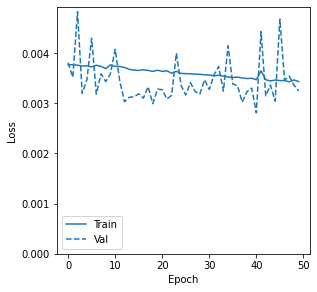

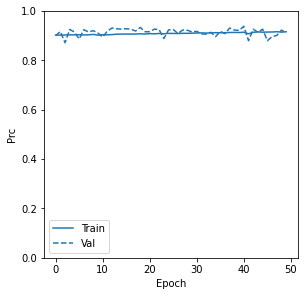

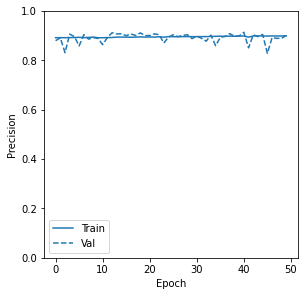

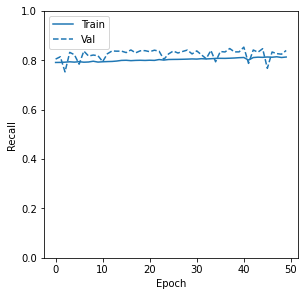

In [36]:
plot_metrics(model.history, (10,10))

In [37]:
model.save('mymodel_v2.h5')

In [88]:
model.predict(X_train[9:10])[0][0]

5.786214e-08

In [ ]:
pred = model.predict(X_train[:1])[0]
for i in range(64):
  print(Y_name[i] + " = " + str(pred[i]))

In [91]:
test = pd.DataFrame()
test["name"] = Y_name
test["prediction"] = pred

In [95]:
test

,name,prediction
0,PUBLIC ACCOUNTING,9.994515e-01
1,MILITARY OR POLICE TRAINING,8.428405e-06
2,ECONOMY,9.499026e-05
3,ADMINISTRATION,3.119994e-04
4,INDUSTRIAL ENGINEERING,1.148529e-07
...,...,...
59,TRAINING RELATED TO THE MILITARY OR POLICE FIELD,5.378347e-08
60,OTHER PROGRAMS ASSOCIATED WITH FINE ARTS,2.209642e-07
61,REPRESENTATIVE ARTS,3.881733e-08
62,"AGRICULTURAL, FORESTRY ENGINEERING",2.890507e-09


In [98]:
test.sort_values(by=['prediction'], ascending=False)

,name,prediction
0,PUBLIC ACCOUNTING,9.994515e-01
3,ADMINISTRATION,3.119994e-04
2,ECONOMY,9.499026e-05
20,UNKNOWN,2.486482e-05
38,UNCLASSIFIED,2.417450e-05
...,...,...
12,MECHANICAL ENGINEERING,3.736329e-09
34,"AGRICULTURAL, FOREST ENGINEERING",3.728271e-09
62,"AGRICULTURAL, FORESTRY ENGINEERING",2.890507e-09
50,ZOOTECHNY,1.222256e-09


In [125]:
def predict_data(data):
  pred = model.predict(data)[0]
  test = pd.DataFrame()
  test["name"] = Y_name
  test['pred'] = np.round(pred,2)
  test_sort = test.sort_values(by=['pred'], ascending=False)
  return test_sort


In [127]:
ex = 138993
predict_data(X_train[ex-1:ex])

,name,pred
9,"GEOLOGY, OTHER NATURAL SCIENCE PROGRAMS",0.94
0,PUBLIC ACCOUNTING,0.04
24,OTHER ENGINEERING,0.01
46,SUPERIOR NORMALS,0.00
45,"SPORTS, PHYSICAL EDUCATION AND RECREATION",0.00
...,...,...
27,"ELECTRONIC ENGINEERING, TELECOMMUNICATIONS",0.00
28,"MINING, METALLURGY ENGINEERING",0.00
29,DESIGN,0.00
30,NURSING,0.00


In [116]:
round(pred[0]*100,2)

99.95